c:\Users\Linh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Linh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


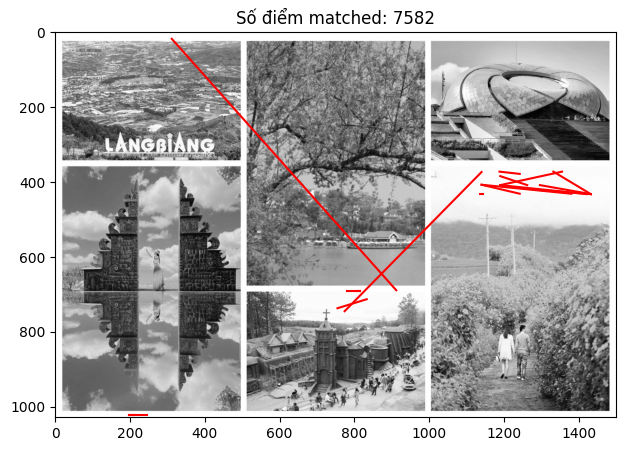

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage.feature import corner_harris, corner_peaks

def compute_descriptor(img, points, window_size=9):
    descriptors = []
    offset = window_size // 2
    for y, x in points:
        if y - offset >= 0 and y + offset < img.shape[0] and x - offset >= 0 and x + offset < img.shape[1]:
            patch = img[y - offset: y + offset + 1, x - offset: x + offset + 1]
            descriptors.append(patch.flatten())
        else:
            descriptors.append(None)
    return descriptors

def match_descriptors(desc1, desc2):
    matches = []
    for i, d1 in enumerate(desc1):
        if d1 is None:
            continue
        best_corr = -1
        best_j = -1
        for j, d2 in enumerate(desc2):
            if d2 is None:
                continue
            corr = np.corrcoef(d1, d2)[0, 1]
            if corr > best_corr:
                best_corr = corr
                best_j = j
        if best_corr > 0.9:  # ngưỡng tương đồng
            matches.append((i, best_j, best_corr))
    return matches

# Đọc 2 ảnh
img1 = iio.imread('Exercise/dalat.jpg', mode='F')
img2 = iio.imread('Exercise/dalat.jpg', mode='F')  

# Tìm điểm góc bằng Harris
coords1 = corner_peaks(corner_harris(img1), min_distance=5)
coords2 = corner_peaks(corner_harris(img2), min_distance=5)

# Tính descriptor
desc1 = compute_descriptor(img1, coords1)
desc2 = compute_descriptor(img2, coords2)

# So khớp
matches = match_descriptors(desc1, desc2)

# Hiển thị
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(img1, cmap='gray')
for m in matches:
    y1, x1 = coords1[m[0]]
    y2, x2 = coords2[m[1]]
    ax.plot([x1, x2], [y1, y2], 'r-')
ax.set_title(f'Số điểm matched: {len(matches)}')
plt.show()
